In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [5]:
n_samples = X.shape[0]

In [6]:
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [7]:
def linear_regression(x):
    return W*x+b

In [8]:
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2))/(2*n_samples)

In [9]:
optimizer = tf.optimizers.SGD(learning_rate)

In [10]:
def run_optimization():
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [11]:
for step in range(1, training_steps+1):
    run_optimization()
    if step%display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.078658, W: 0.275208, b: 0.631682
step: 100, loss: 0.078460, W: 0.273819, b: 0.641530
step: 150, loss: 0.078285, W: 0.272511, b: 0.650796
step: 200, loss: 0.078130, W: 0.271281, b: 0.659517
step: 250, loss: 0.077992, W: 0.270124, b: 0.667724
step: 300, loss: 0.077871, W: 0.269034, b: 0.675447
step: 350, loss: 0.077763, W: 0.268009, b: 0.682715
step: 400, loss: 0.077668, W: 0.267044, b: 0.689555
step: 450, loss: 0.077583, W: 0.266136, b: 0.695992
step: 500, loss: 0.077508, W: 0.265282, b: 0.702050
step: 550, loss: 0.077442, W: 0.264478, b: 0.707750
step: 600, loss: 0.077383, W: 0.263721, b: 0.713115
step: 650, loss: 0.077331, W: 0.263009, b: 0.718164
step: 700, loss: 0.077285, W: 0.262339, b: 0.722915
step: 750, loss: 0.077245, W: 0.261708, b: 0.727386
step: 800, loss: 0.077208, W: 0.261115, b: 0.731594
step: 850, loss: 0.077176, W: 0.260556, b: 0.735554
step: 900, loss: 0.077148, W: 0.260031, b: 0.739280
step: 950, loss: 0.077123, W: 0.259536, b: 0.742787
step: 1000, l

In [12]:
import matplotlib.pyplot as plt

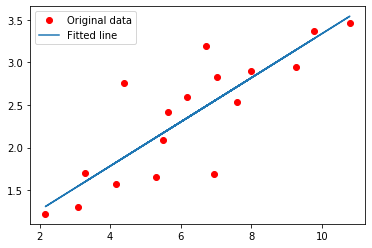

In [13]:
plt.plot(X, Y, 'ro', label="Original data")
plt.plot(X, np.array(W*X+b), label="Fitted line")
plt.legend()
plt.show()